## Task 1

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [49]:
"""
Diagnostic Wisconsin Breast Cancer Database.
"""
data1 = pd.read_csv('/content/breast-cancer-wisconsin-data.csv')
data1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
print(data1['diagnosis'].unique())

data1.isnull().sum()

['M' 'B']


,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [51]:
"""
Using chemical analysis to determine the quality of wines
"""
data2 = pd.read_csv('/content/WineQT.csv')
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [52]:
print(data2['quality'].unique())

data2.isnull().sum()

[5 6 7 4 8 3]


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [53]:
X1 = data1.drop('diagnosis', axis=1)
y1 = data1['diagnosis']

X2 = data2.drop('quality', axis=1)
y2 = data2['quality']

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [55]:
# Dataset 1 using gini(without pruning)
model1 = DecisionTreeClassifier(criterion='gini')
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)
trackModel1 = model1.score(X1_train, y1_train)
accuracy1 = accuracy_score(y1_test, y1_pred)

print(f'Dataset 1(using gini without pruning) Training Accuracy: {trackModel1}')
print(f'Dataset 1(using gini without pruning) Testing Accuracy: {accuracy1}')

Dataset 1(using gini without pruning) Training Accuracy: 1.0
Dataset 1(using gini without pruning) Testing Accuracy: 0.9385964912280702


In [56]:
# Dataset 1 using gini(with pruning)
model1pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
model1pruned.fit(X1_train, y1_train)
y1_pred = model1pruned.predict(X1_test)
trackModel1 = model1pruned.score(X1_train, y1_train)
accuracy1 = accuracy_score(y1_test, y1_pred)

print(f'Dataset 1(using gini with pruning) Training Accuracy: {trackModel1}')
print(f'Dataset 1(using gini with pruning) Testing Accuracy: {accuracy1}')

Dataset 1(using gini with pruning) Training Accuracy: 0.9582417582417583
Dataset 1(using gini with pruning) Testing Accuracy: 0.9473684210526315


In [57]:
# Dataset 1 DT using entropy(without pruning)
model1pruned = DecisionTreeClassifier(criterion='entropy')
model1pruned.fit(X1_train, y1_train)
y1_pred = model1pruned.predict(X1_test)
trackModel1 = model1pruned.score(X1_train, y1_train)
accuracy1 = accuracy_score(y1_test, y1_pred)

print(f'Dataset 1(using entropy without pruning) Training Accuracy: {trackModel1}')
print(f'Dataset 1(using entropy without pruning) Testing Accuracy: {accuracy1}')

Dataset 1(using entropy without pruning) Training Accuracy: 1.0
Dataset 1(using entropy without pruning) Testing Accuracy: 0.9385964912280702


In [58]:
# Dataset 1 DT using entropy(with pruning)
model1pruned = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
model1pruned.fit(X1_train, y1_train)
y1_pred = model1pruned.predict(X1_test)
trackModel1 = model1pruned.score(X1_train, y1_train)
accuracy1 = accuracy_score(y1_test, y1_pred)

print(f'Dataset 1(using entropy with pruning) Training Accuracy: {trackModel1}')
print(f'Dataset 1(using entropy with pruning) Testing Accuracy: {accuracy1}')

Dataset 1(using entropy with pruning) Training Accuracy: 0.989010989010989
Dataset 1(using entropy with pruning) Testing Accuracy: 0.956140350877193


In [59]:
# Dataset 2 using gini(without pruning)
model2 = DecisionTreeClassifier(criterion='gini')
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)
trackModel2 = model2.score(X2_train, y2_train)
accuracy2 = accuracy_score(y2_test, y2_pred)

print(f'Dataset 2(using gini without pruning) Training Accuracy: {trackModel2}')
print(f'Dataset 2(using gini without pruning) Testing Accuracy: {accuracy2}')

Dataset 2(using gini without pruning) Training Accuracy: 1.0
Dataset 2(using gini without pruning) Testing Accuracy: 0.5589519650655022


In [60]:
# Dataset 2 using gini(with pruning)
model2pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.015)
model2pruned.fit(X2_train, y2_train)
y2_pred = model2pruned.predict(X2_test)
trackModel2 = model2pruned.score(X2_train, y2_train)
accuracy2 = accuracy_score(y2_test, y2_pred)

print(f'Dataset 2(using gini with pruning) Training Accuracy: {trackModel2}')
print(f'Dataset 2(using gini with pruning) Testing Accuracy: {accuracy2}')

Dataset 2(using gini with pruning) Training Accuracy: 0.5568927789934355
Dataset 2(using gini with pruning) Testing Accuracy: 0.5676855895196506


In [61]:
# Dataset 2 using entropy(without pruning)
model2 = DecisionTreeClassifier(criterion='entropy')
model2.fit(X2_train, y2_train)
y2_pred = model2pruned.predict(X2_test)
trackModel2 = model2pruned.score(X2_train, y2_train)
accuracy2 = accuracy_score(y2_test, y2_pred)

print(f'Dataset 2(using entropy without pruning) Training Accuracy: {trackModel2}')
print(f'Dataset 2(using entropy without pruning) Testing Accuracy: {accuracy2}')

Dataset 2(using entropy without pruning) Training Accuracy: 0.5568927789934355
Dataset 2(using entropy without pruning) Testing Accuracy: 0.5676855895196506


In [62]:
# Dataset 2 using entropy(with pruning)
model2pruned = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.015)
model2pruned.fit(X2_train, y2_train)
y2_pred = model2pruned.predict(X2_test)
trackModel2 = model2pruned.score(X2_train, y2_train)
accuracy2 = accuracy_score(y2_test, y2_pred)

print(f'Dataset 2(using entropy with pruning) Training Accuracy: {trackModel2}')
print(f'Dataset 2(using entropy with pruning) Testing Accuracy: {accuracy2}')

Dataset 2(using entropy with pruning) Training Accuracy: 0.6083150984682714
Dataset 2(using entropy with pruning) Testing Accuracy: 0.5458515283842795


In [63]:
model2.fit(X2_train, y2_train)
y_pred = model2.predict(X2_test)

correct = (y_pred == y2_test).sum()
wrong = (y_pred != y2_test).sum()
total = len(y2_test)

print(f"Correctly Predicted: {correct} out of {total}")
print(f"Wrong Predictions: {wrong} out of {total}")


Correctly Predicted: 132 out of 229
Wrong Predictions: 97 out of 229


## Task 2

In [64]:
df = pd.read_csv('task2.csv')
df.head()

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS (Yes or No)
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No


In [65]:
df['CLASS'] = df['CLASS (Yes or No)']

In [66]:
df.drop(columns=['CLASS (Yes or No)',], inplace=True)
df.drop(columns=['ID',], inplace=True)

In [67]:
def calculate_entropy(column):
    probs = column.value_counts(normalize=True).values
    probs = probs[probs > 0]
    return -np.sum(probs * np.log2(probs))

def conditional_entropy(df, attr, target='CLASS'):
    n = len(df)
    ce = 0.0
    for val, subset in df.groupby(attr):
        weight = len(subset) / n
        ce += weight * calculate_entropy(subset[target])
    return ce

In [68]:
S = calculate_entropy(df['CLASS'])
attributes = [c for c in df.columns if c != 'CLASS']

H_given_attr = {attr: conditional_entropy(df, attr) for attr in attributes}
IG = {attr: S - H_given_attr[attr] for attr in attributes}

root = max(IG, key=IG.get)

print(f"S= {S:.2f}\n")
for attr in attributes:
    print(f"{attr}: S(CLASS|{attr}) = {H_given_attr[attr]:.2f}    IG = {IG[attr]:.2f}")
print("\nRoot :", root)

S= 0.97

AGE: S(CLASS|AGE) = 0.89    IG = 0.08
JOB_STATUS: S(CLASS|JOB_STATUS) = 0.65    IG = 0.32
OWNS_HOUSE: S(CLASS|OWNS_HOUSE) = 0.55    IG = 0.42
CREDIT_RATING: S(CLASS|CREDIT_RATING) = 0.61    IG = 0.36

Root : OWNS_HOUSE


## Task 3

In [69]:
df = pd.read_csv('/content/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [70]:
df['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


In [71]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [72]:
df.duplicated().sum()


np.int64(0)

In [73]:
df.dtypes

,0
index,int64
Patient Id,object
Age,int64
Gender,int64
Air Pollution,int64
Alcohol use,int64
Dust Allergy,int64
OccuPational Hazards,int64
Genetic Risk,int64
chronic Lung Disease,int64


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.drop('Patient Id',axis=1)
X = df.drop('Level',axis=1)
y = df['Level']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train_val,X_val,y_train_val,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=0)



In [75]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy')
modeldt = dt.fit(X_train_val,y_train_val)

train_acc = accuracy_score(y_train_val, dt.predict(X_train_val))
val_acc = accuracy_score(y_val, dt.predict(X_val))

In [76]:
test_acc = accuracy_score(y_test, dt.predict(X_test))


In [77]:
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 1.0
Validation Accuracy: 1.0
Testing Accuracy: 1.0


In [78]:
feature_names = df.drop("Level", axis=1).columns

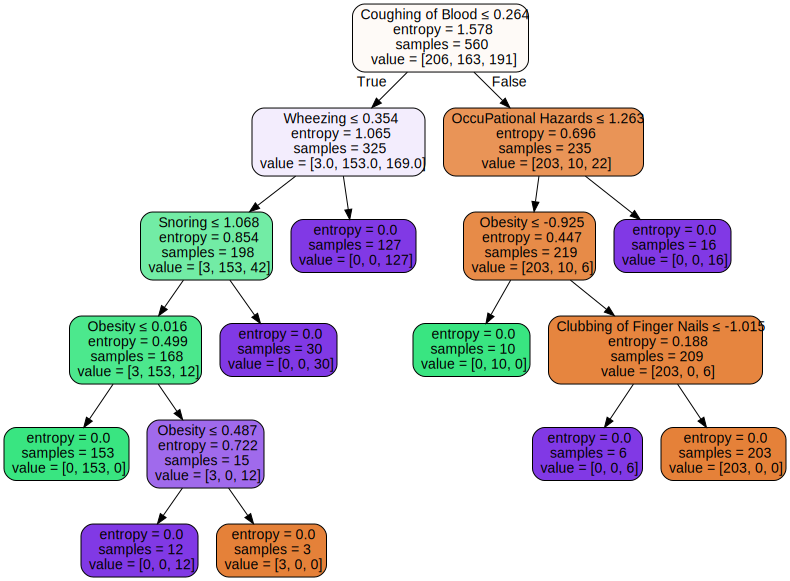

In [83]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(dt,
                           feature_names=feature_names,
                           filled = True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

## Task 4

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [93]:
df = pd.read_csv('/content/task4.csv')
df.head()

,student,prior experience,course,time,liked
0,1,yes,programming,day,yes
1,2,no,programming,day,no
2,3,yes,history,night,no
3,4,no,programming,night,yes
4,5,yes,english,day,yes


In [95]:
le = LabelEncoder()
for col in ['prior experience', 'course', 'time', 'liked']:
    df[col] = le.fit_transform(df[col])


Y = df['liked']
X = df.drop('liked', axis=1)

dt = DecisionTreeClassifier(criterion='gini', random_state=0)
dt.fit(X, Y)

DecisionTreeClassifier(random_state=0)

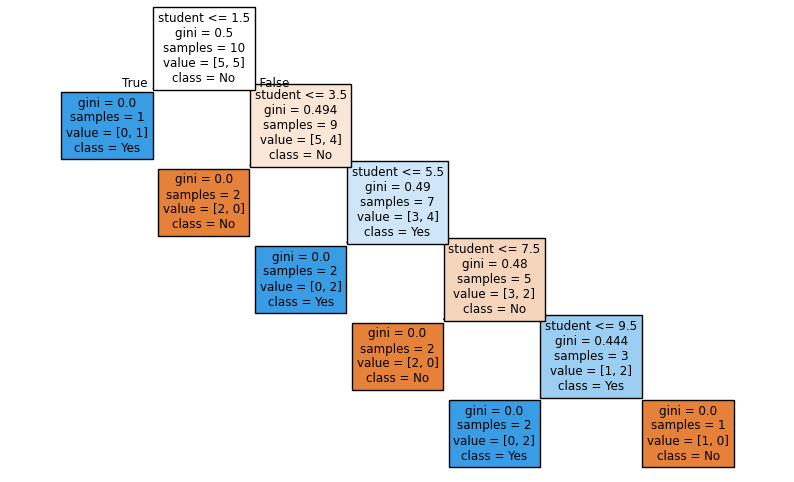

In [96]:
plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()